In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [31]:
# Leemos la imagen e imprimimos sus caracteristicas

img = cv.imread('estrella_facil.png',cv.IMREAD_GRAYSCALE)


Estructura de la imagen: (426, 755)
Cantidad total de pixeles: 321630
Tipo de dato de cada pixel: uint8
Imagen BW


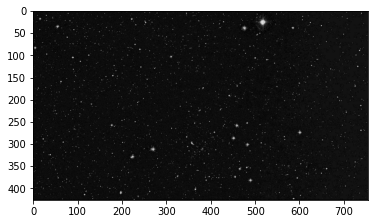

In [32]:
print('Estructura de la imagen: {}'.format(img.shape))
print('Cantidad total de pixeles: {}'.format(img.size))
print('Tipo de dato de cada pixel: {}'.format(img.dtype))

if len(img.shape)==3:
    print('Imagen COLOR')
else:
    print('Imagen BW')


# Muestamos la imagen original

plt.imshow(img, cmap='gray');

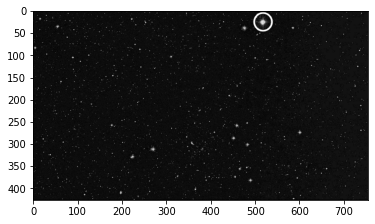

In [5]:
# Para encontrar la estrella mas brillante, primero intentamos buscando el pixel con mayor valor

(minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(img)
  
anotaciones = np.zeros(img.shape, dtype='uint8')
cv.circle(anotaciones, maxLoc,20,255,2,cv.LINE_AA) # Dibujamos un circulo en la posición encontrada

img_suma = cv.add(img,anotaciones)
plt.imshow(img_suma, cmap='gray');


In [42]:
ret, mask = cv.threshold(img,160,255, cv.THRESH_BINARY_INV)

#plt.imshow(mask, cmap='gray');
#gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # convert to grayscale
# threshold to get just the signature (INVERTED)
retval, thresh_gray = cv.threshold(mask, thresh=100, maxval=255, \
                                   type=cv.THRESH_BINARY_INV)

contours, hierarchy = cv.findContours(thresh_gray,cv.RETR_LIST, \
                                   cv.CHAIN_APPROX_SIMPLE)

# Find object with the biggest bounding box
mx = (0,0,0,0)      # biggest bounding box so far
mx_area = 0
for cont in contours:
    x,y,w,h = cv.boundingRect(cont)
    area = w*h
    if area > mx_area:
        mx = x,y,w,h
        mx_area = area
x,y,w,h = mx

In [45]:
x,y,w,h

(512, 16, 12, 16)

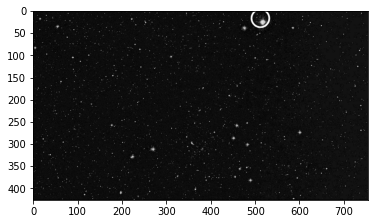

In [48]:
anotaciones = np.zeros(img.shape, dtype='uint8')
cv.circle(anotaciones, (x,y),20,255,2,cv.LINE_AA) # Dibujamos un circulo en la posición encontrada

img_suma = cv.add(img,anotaciones)
plt.imshow(img_suma, cmap='gray');
